<a href="https://colab.research.google.com/github/malh718/datasci_6_anova/blob/main/anova2_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install ucimlrepo


In [61]:
from ucimlrepo import fetch_ucirepo


In [59]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [62]:
import matplotlib.pyplot as plt



Variables of Interest

A1C, Race and time in hospital are the variables we are interested in. The dependent variable is the time in hospital.

The reason why I chose this was because of the powerpoint slide for this week that mentioned the Research Question: How do the race of the patient (race) and
their A1C test results (A1Cresult) jointly influence the duration of
their hospital stay (time_in_hospital)?
Factor 1 (Race - race): Caucasian, Asian, African American,
Hispanic, Other
Factor 2 (A1C test result - a1c): >8%, 7%, Normal, None (not
measure)
Dependent Variable: Duration hospital stay (time_in_hospital)


In [199]:
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets


/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [200]:
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata)


{'uci_id': 296, 'name': 'Diabetes 130-US hospitals for years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

In [201]:
df = pd.DataFrame(X)
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [202]:
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)


                        name     role         type demographic  \
0               encounter_id       ID                     None   
1                patient_nbr       ID                     None   
2                       race  Feature  Categorical        Race   
3                     gender  Feature  Categorical      Gender   
4                        age  Feature  Categorical         Age   
5                     weight  Feature  Categorical        None   
6          admission_type_id  Feature  Categorical        None   
7   discharge_disposition_id  Feature  Categorical        None   
8        admission_source_id  Feature  Categorical        None   
9           time_in_hospital  Feature      Integer        None   
10                payer_code  Feature  Categorical        None   
11         medical_specialty  Feature  Categorical        None   
12        num_lab_procedures  Feature      Integer        None   
13            num_procedures  Feature      Integer        None   
14        

In [134]:
df = pd.DataFrame(X)
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [203]:
voi = ['race', 'A1Cresult', 'time_in_hospital']
diadata = df[voi]

In [204]:
dt = diadata.dtypes
dt

race                object
A1Cresult           object
time_in_hospital     int64
dtype: object

In [221]:
mv = diadata.isnull().sum()
mv

race                2273
A1Cresult              0
time_in_hospital       0
dtype: int64

In [209]:
df.to_csv('pls.csv')


In [222]:
d2=diadata.dropna(subset=['race'])

In [223]:
d2

,race,A1Cresult,time_in_hospital
0,Caucasian,None,1
1,Caucasian,None,3
2,AfricanAmerican,None,2
3,Caucasian,None,2
4,Caucasian,None,1
...,...,...,...
101761,AfricanAmerican,>8,3
101762,AfricanAmerican,None,5
101763,Caucasian,None,1
101764,Caucasian,None,10


In [213]:
# data types
diadata.dtypes


race                object
A1Cresult           object
time_in_hospital     int64
dtype: object

In [215]:
print('Main DV: ', stats.shapiro(df['time_in_hospital']))


Main DV:  ShapiroResult(statistic=0.8869192600250244, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


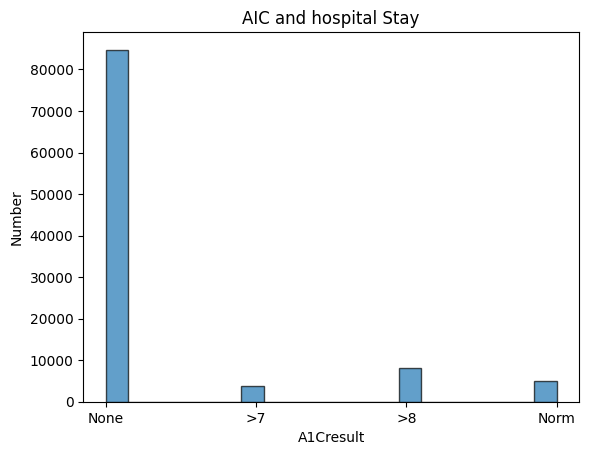

In [70]:
plt.hist(df['A1Cresult'], bins=20, edgecolor='k', alpha=0.7)
plt.title('AIC and hospital Stay')
plt.xlabel('A1Cresult')
plt.ylabel('Number')
plt.show()



In [236]:
groups = d2.groupby(['race', 'A1Cresult'])

for (race_status, A1Cresult_status), group_d2 in groups:
    _, p_value = stats.shapiro(group_d2['time_in_hospital'])

    print(f"Group ({race_status}, {A1Cresult_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")


Group (AfricanAmerican, >7):
P-value from Shapiro-Wilk Test: 1.8906119489850806e-16

Group (AfricanAmerican, >8):
P-value from Shapiro-Wilk Test: 6.7359146155303186e-34

Group (AfricanAmerican, None):
P-value from Shapiro-Wilk Test: 0.0

Group (AfricanAmerican, Norm):
P-value from Shapiro-Wilk Test: 2.9696700824519264e-25

Group (Asian, >7):
P-value from Shapiro-Wilk Test: 0.0023467366117984056

Group (Asian, >8):
P-value from Shapiro-Wilk Test: 2.233798113593366e-05

Group (Asian, None):
P-value from Shapiro-Wilk Test: 2.6558121925662052e-21

Group (Asian, Norm):
P-value from Shapiro-Wilk Test: 0.0007482930086553097

Group (Caucasian, >7):
P-value from Shapiro-Wilk Test: 1.7925673399754353e-38

Group (Caucasian, >8):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, Norm):
P-value from Shapiro-Wilk Test: 1.930148504761003e-41

Group (Hispanic, >7):
P-value from Shapiro-Wilk Test: 2.1721559733123286e-06

Group (Hispanic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [224]:
data_types = d2.dtypes
data_types


race                object
A1Cresult           object
time_in_hospital     int64
dtype: object

In [233]:
d2.shape

(99493, 3)

In [244]:
stats.levene(
d2['time_in_hospital'][d2['race'] == 'AfricanAmerican'][d2['A1Cresult'] == '>7'],
d2['time_in_hospital'][d2['race'] == 'AfricanAmerican'][d2['A1Cresult'] == '>8'],
d2['time_in_hospital'][d2['race'] == 'AfricanAmerican'][d2['A1Cresult'] == 'None'],
d2['time_in_hospital'][d2['race'] == 'AfricanAmerican'][d2['A1Cresult'] == 'Norm'],
d2['time_in_hospital'][d2['race'] == 'Asian'][d2['A1Cresult'] == '>7'],
d2['time_in_hospital'][d2['race'] == 'Asian'][d2['A1Cresult'] == '>8'],
d2['time_in_hospital'][d2['race'] == 'Asian'][d2['A1Cresult'] == 'None'],
d2['time_in_hospital'][d2['race'] == 'Asian'][d2['A1Cresult'] == 'Norm'],
d2['time_in_hospital'][d2['race'] == 'Caucasian'][d2['A1Cresult'] == '>7'],
d2['time_in_hospital'][d2['race'] == 'Caucasian'][d2['A1Cresult'] == '>8'],
d2['time_in_hospital'][d2['race'] == 'Caucasian'][d2['A1Cresult'] == 'None'],
d2['time_in_hospital'][d2['race'] == 'Caucasian'][d2['A1Cresult'] == 'Norm'],
d2['time_in_hospital'][d2['race'] == 'Hispanic'][d2['A1Cresult'] == '>7'],
d2['time_in_hospital'][d2['race'] == 'Hispanic'][d2['A1Cresult'] == '>8'],
d2['time_in_hospital'][d2['race'] == 'Hispanic'][d2['A1Cresult'] == 'None'],
d2['time_in_hospital'][d2['race'] == 'Hispanic'][d2['A1Cresult'] == 'Norm'],
d2['time_in_hospital'][d2['race'] == 'Other'][d2['A1Cresult'] == '>7'],
d2['time_in_hospital'][d2['race'] == 'Other'][d2['A1Cresult'] == '>8'],
d2['time_in_hospital'][d2['race'] == 'Other'][d2['A1Cresult'] == 'None'],
d2['time_in_hospital'][d2['race'] == 'Other'][d2['A1Cresult'] == 'Norm'],
)


LeveneResult(statistic=7.450102003925801, pvalue=9.580811219790571e-21)

Interpretation

The Levene test initially showed an issue when I was completing it. I tried this test approxiemtly 5 times with different results and ultimately I did determine my Leven result with a statsitc of 7.45 and a p value of 9.58e-21. My first mistake when completeing this table was I had put the AIC >7 and >8 for the different races, however I neglected to include "None" and "Norm'. Once I fixed that I still got Nan for both the statistics. I dropped my null values and re did this multiple times and got my result. What this means is that the p-value is very small so we can reject the null. The Levene test proves there are some differences present.




The shapiro test conducted above indicates that the data is not normally distrubuted. What this proves is that since the p value is near zero and not distributed normally. Even the values with higher p values are still low.

In [238]:
model = ols('time_in_hospital ~ C(race) * C(A1Cresult)', data=d2).fit()

In [239]:

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                             sum_sq       df           F        PR(>F)
C(race)                  641.735130      4.0   18.075566  7.501203e-15
C(A1Cresult)            3895.231358      3.0  146.287793  1.363867e-94
C(race):C(A1Cresult)     276.823623     12.0    2.599070  1.845652e-03
Residual              882895.150091  99473.0         NaN           NaN


The ANOVA results are significant so we have to conduct a Tukey post hoc test

Tukeys Post Hoc Test

In [178]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [240]:
tukey = pairwise_tukeyhsd (endog=diadata['time_in_hospital'],
                          groups=diadata['A1Cresult'],
                          alpha=0.05)

In [241]:
print("Tukey HSD- A1C Results:\n", tukey)


Tukey HSD- A1C Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    >7     >8    -0.14 0.0773   -0.29  0.0099  False
    >7   None  -0.5808    0.0 -0.7075 -0.4541   True
    >7   Norm   0.0348 0.9486 -0.1299  0.1994  False
    >8   None  -0.4408    0.0 -0.5292 -0.3524   True
    >8   Norm   0.1748 0.0059  0.0374  0.3121   True
  None   Norm   0.6156    0.0  0.5041  0.7271   True
----------------------------------------------------


The differnece between >7 and >8 is the p value which is more than .05 and is actually .0773. We do not reject the null hypthesis in this instance.For >7 compared to none the value is 0. We do reject the null hypthesis.

In [242]:
ukey = pairwise_tukeyhsd (endog=d2['time_in_hospital'],
                          groups=d2['race'],
                          alpha=0.05)

In [243]:
print("Tukey HSD- Race:\n", ukey)


Tukey HSD- Race:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1       group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
AfricanAmerican     Asian  -0.5125 0.0002 -0.8396 -0.1855   True
AfricanAmerican Caucasian  -0.1221    0.0 -0.1879 -0.0564   True
AfricanAmerican  Hispanic   -0.448    0.0 -0.6378 -0.2582   True
AfricanAmerican     Other  -0.2343 0.0278 -0.4523 -0.0163   True
          Asian Caucasian   0.3904 0.0087  0.0673  0.7135   True
          Asian  Hispanic   0.0646 0.9894 -0.3043  0.4335  False
          Asian     Other   0.2783 0.2778 -0.1059  0.6624  False
      Caucasian  Hispanic  -0.3258    0.0 -0.5087  -0.143   True
      Caucasian     Other  -0.1121 0.5995 -0.3241  0.0998  False
       Hispanic     Other   0.2137 0.2175 -0.0631  0.4905  False
----------------------------------------------------------------


Intially I had an error n this example, I see that I have missing values for race. This is very confusing to me as in lines 180 I did drop.na() which I thought would drop all my null values that are present in the race colomn. I tried multiple times to drop the null. What is important to note in the case of the p value being less than .05, we have to reject.


____________________________________________________________

I had the missing values, and even though I had the drop it was not working. After a few more tries troubleshooting and getting help from peers, I was able to get rid of the null values and complete the test. As we see the between AA and Asian the p value is .0002 which is less than .05 and so we reject it. For AA vs Caucasion the P is 0.0 and we also reject the hypothesis as AA have a higher mean. For AA vs Hispanicthe value is 0.0 and for AA vs Other the p is .0278.


